In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sklearn

In [ ]:
# Data Loading and Inspection

In [5]:

# Load the dataset
data = pd.read_csv('ACDC_radiomics.csv')

# Display the first few rows of the dataset
data.head()

# Get a summary of the data, including data types and missing values
data.info()

# Get summary statistics for numerical columns
data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Columns: 645 entries, original_shape_Elongation_LV_ED to class
dtypes: float64(601), int64(43), object(1)
memory usage: 504.0+ KB


,original_shape_Elongation_LV_ED,original_shape_Flatness_LV_ED,original_shape_LeastAxisLength_LV_ED,original_shape_MajorAxisLength_LV_ED,original_shape_Maximum2DDiameterColumn_LV_ED,original_shape_Maximum2DDiameterRow_LV_ED,original_shape_Maximum2DDiameterSlice_LV_ED,original_shape_Maximum3DDiameter_LV_ED,original_shape_MeshVolume_LV_ED,original_shape_MinorAxisLength_LV_ED,...,original_glszm_ZoneEntropy_MYO_ES,original_glszm_ZonePercentage_MYO_ES,original_glszm_ZoneVariance_MYO_ES,original_ngtdm_Busyness_MYO_ES,original_ngtdm_Coarseness_MYO_ES,original_ngtdm_Complexity_MYO_ES,original_ngtdm_Contrast_MYO_ES,original_ngtdm_Strength_MYO_ES,height,weight
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,1.000000e+02,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.559329,0.116327,7.027303,61.907922,48.331549,67.959597,62.818826,69.083915,7830.536250,34.273933,...,4.278958,0.030509,2.157801e+05,43.418370,0.001517,22.200001,0.012399,0.055277,170.840000,74.960000
std,0.086312,0.044954,2.421983,11.241951,11.736217,12.777552,14.225637,12.871657,4335.369673,6.211781,...,0.657176,0.030895,4.108047e+05,35.480593,0.000714,61.319519,0.009736,0.081740,9.710683,16.632037
min,0.374291,0.046936,3.365035,41.204891,21.095023,46.043458,30.066593,47.053161,1984.375000,21.095961,...,3.193796,0.003233,3.176649e+02,1.770204,0.000443,0.562589,0.001240,0.003402,140.000000,35.000000
25%,0.496768,0.090354,5.547015,55.335903,41.403462,60.588288,54.071708,61.554810,5201.843750,30.218074,...,3.814769,0.014291,5.873236e+04,19.791961,0.001002,2.485099,0.007079,0.012007,165.000000,62.750000
50%,0.562325,0.105700,6.572642,61.729255,45.951022,66.471721,61.683455,67.646128,6743.020833,33.479543,...,4.150802,0.021955,1.295591e+05,34.946317,0.001372,4.207814,0.009971,0.022363,171.500000,75.000000
75%,0.603154,0.123933,7.438589,66.349397,53.235327,73.659458,70.000000,74.787973,9282.125000,38.097940,...,4.638770,0.031424,2.345962e+05,55.753123,0.001819,13.739332,0.013831,0.062622,178.000000,85.000000
max,0.791923,0.286265,16.244584,131.551946,90.138782,143.391074,139.003597,144.371050,26335.375000,59.645360,...,6.251883,0.205567,3.806504e+06,185.157865,0.004126,515.368502,0.066583,0.450330,192.000000,123.000000


In [ ]:
# let us check for missing values, type of features and outliers

In [6]:

# Count the missing values per feature
missing_values = data.isnull().sum()

# Calculate the percentage of missing values per feature
missing_percentage = (missing_values / len(data)) * 100

# Show missing values count and percentage
missing_info = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
print(missing_info)

# Check for features with more than 50% missing data
missing_info[missing_info['Percentage'] > 50]


                                              Missing Values  Percentage
original_shape_Elongation_LV_ED                            0         0.0
original_shape_Flatness_LV_ED                              0         0.0
original_shape_LeastAxisLength_LV_ED                       0         0.0
original_shape_MajorAxisLength_LV_ED                       0         0.0
original_shape_Maximum2DDiameterColumn_LV_ED               0         0.0
...                                                      ...         ...
original_ngtdm_Contrast_MYO_ES                             0         0.0
original_ngtdm_Strength_MYO_ES                             0         0.0
height                                                     0         0.0
weight                                                     0         0.0
class                                                      0         0.0

[645 rows x 2 columns]


,Missing Values,Percentage


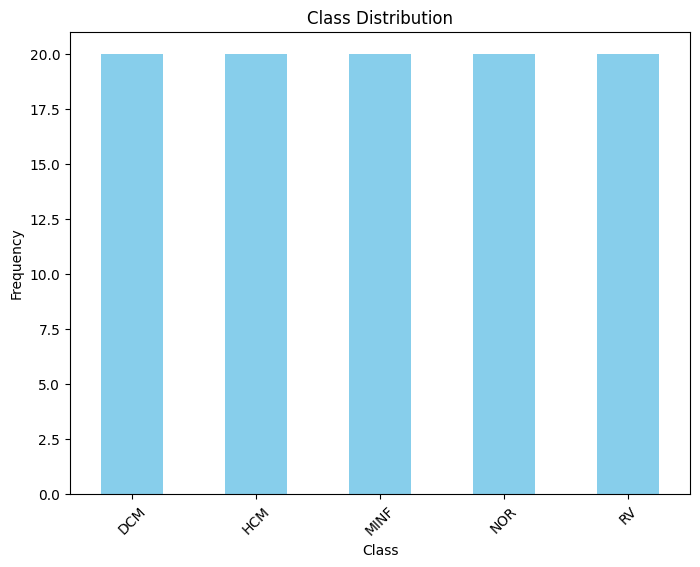

In [7]:
# Check the class distribution
class_counts = data['class'].value_counts()

# Plot the distribution
plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar', color='skyblue')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# It looks like we have quite a balanced class distribution

In [ ]:
# We have quite a large dataset with about 642 feature. I first followed the default visualization of features to see their distribution but the visual was very poor.
# Therefore I chose to first use PCA to reduce high dimensional data into 2 and or 3 components for easier visualization while retaining most of the variance in the data.
# I chose PCA over t-SNE because; 
# 1. We want to preserve as much variance as possible in the reduced space, which is especially useful when you plan to use the reduced features in a model later, i.e for training).
# 2. We want a quick overview of the data's variance.
# 3. We need to reduce dimensionality for further analysis (e.g., clustering, supervised learning).
# 4. We want a faster, more scalable method for large datasets since PCA is less computationally expensive than t-SNE.

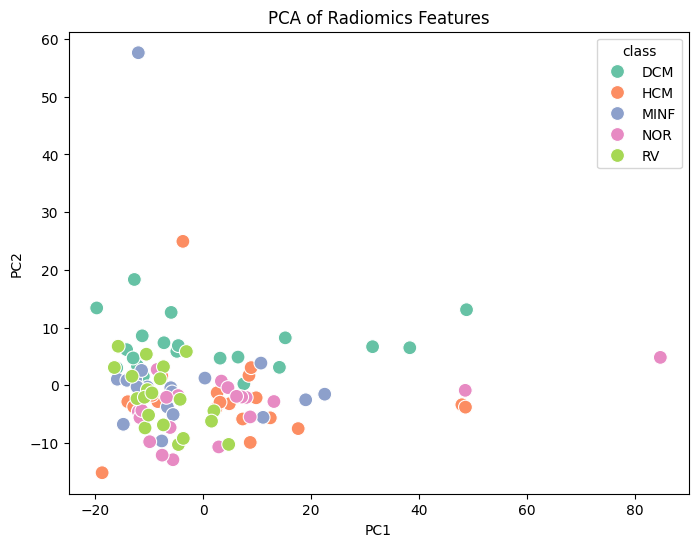

In [9]:

# Select only the numerical features for PCA
numerical_data = data.drop(columns=['class'])

# Standardizing the data (PCA is sensitive to scaling)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_data_scaled = scaler.fit_transform(numerical_data)

# Apply PCA to reduce the data to 2 components
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(numerical_data_scaled)

# Create a DataFrame with the PCA results
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
pca_df['class'] = data['class']  # Add the class labels for color coding

# Plot the PCA result
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='class', data=pca_df, palette='Set2', s=100)
plt.title('PCA of Radiomics Features')
plt.show()


In [ ]:
# This plot has reduced the dataset to two principal components (PC1 and PC2), making it easier to visualize the data


In [ ]:
# After applying PCA, we can now visualize the distribution of these 2 principal components (PC1, PC2) instead of the original features:

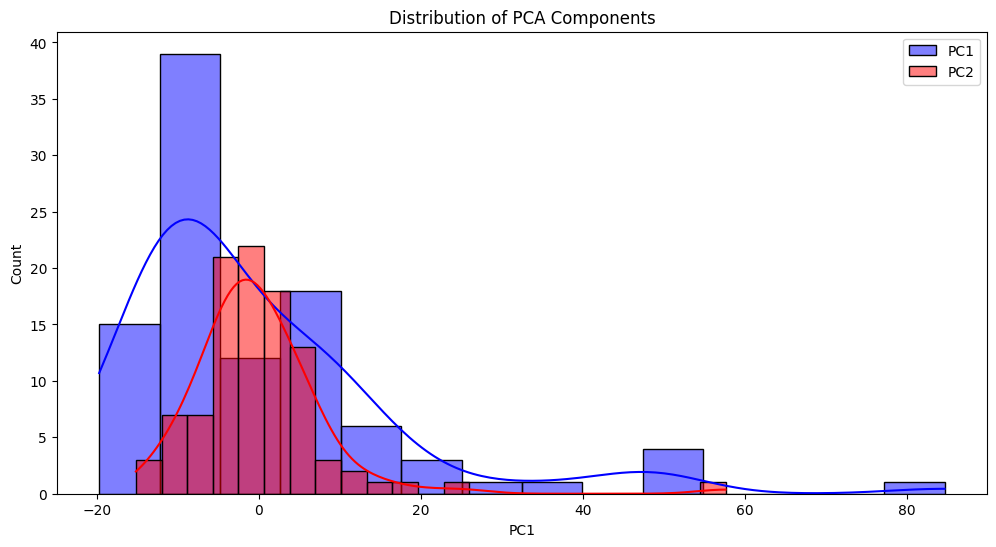

In [10]:
# Visualize the distribution of the two principal components
plt.figure(figsize=(12, 6))
sns.histplot(pca_df['PC1'], kde=True, color='blue', label='PC1')
sns.histplot(pca_df['PC2'], kde=True, color='red', label='PC2')
plt.title('Distribution of PCA Components')
plt.legend()
plt.show()


In [ ]:
# lets look at cumulative explained variance, Number of Principal Components needed to explain 90% variance

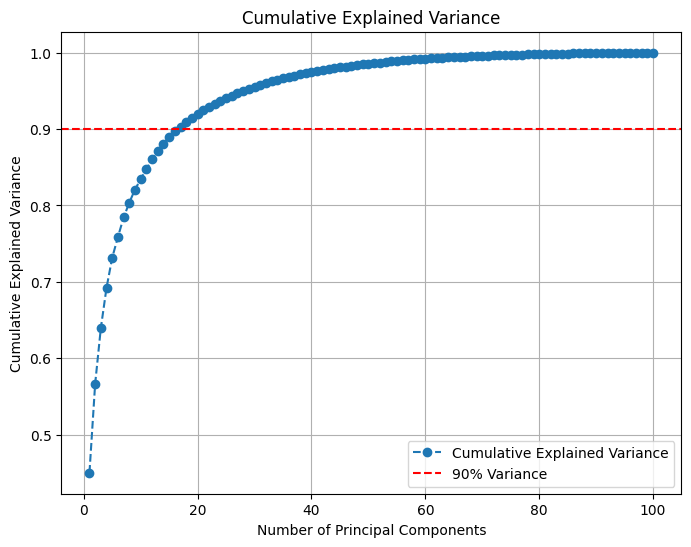

Number of components needed for 90% variance: 17


In [11]:

from sklearn.decomposition import PCA

# Fit PCA to your scaled data
pca_all = PCA()
pca_all.fit(numerical_data_scaled)

# Calculate the cumulative explained variance
explained_variance = np.cumsum(pca_all.explained_variance_ratio_)

# Plot the cumulative explained variance
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--', label='Cumulative Explained Variance')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)

# Add a horizontal line at 90% explained variance
plt.axhline(y=0.90, color='r', linestyle='--', label='90% Variance')

# Add legend
plt.legend(loc='best')

# Show the plot
plt.show()

# Find the number of components needed to explain 90% variance
n_components_90 = np.argmax(explained_variance >= 0.90) + 1  # +1 since index starts at 0
print(f"Number of components needed for 90% variance: {n_components_90}")


In [12]:
# Select only the numerical features for PCA
numerical_data = data.drop(columns=['class'])

# Standardizing the data 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_data_scaled = scaler.fit_transform(numerical_data)

# Apply PCA to reduce the data to 17 components (instead of 2)
from sklearn.decomposition import PCA
pca = PCA(n_components=17)  # we can always adjust this number
pca_result = pca.fit_transform(numerical_data_scaled)

# Create a DataFrame with the PCA results
pca_df = pd.DataFrame(pca_result, columns=[f'PC{i+1}' for i in range(17)])  # This Names columns as PC1, PC2, ..., PC17
pca_df['class'] = data['class']  # Adding the class labels for color coding

# Now you have 17 principal components in the DataFrame, we can use them for further analysis
# Example: View the explained variance ratio for each principal component
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio for each principal component:")
print(explained_variance_ratio)



Explained Variance Ratio for each principal component:
[0.45013608 0.1164318  0.07303252 0.05279159 0.03934504 0.02700238
 0.02556019 0.01951001 0.01712036 0.01342007 0.01331722 0.01256349
 0.01086227 0.00983617 0.00871546 0.00723341 0.00650822]


In [ ]:
# applying LDA to our dataset

In [ ]:
# Linear Discriminant Analysis (LDA) is a dimensionality reduction technique that's particularly useful when you want to classify your data into distinct categories
# based on the features. It aims to find a lower-dimensional space that maximizes the separation between classes. 
# LDA is similar to PCA, but while PCA maximizes the variance, LDA maximizes the class separability.

Accuracy: 0.9000


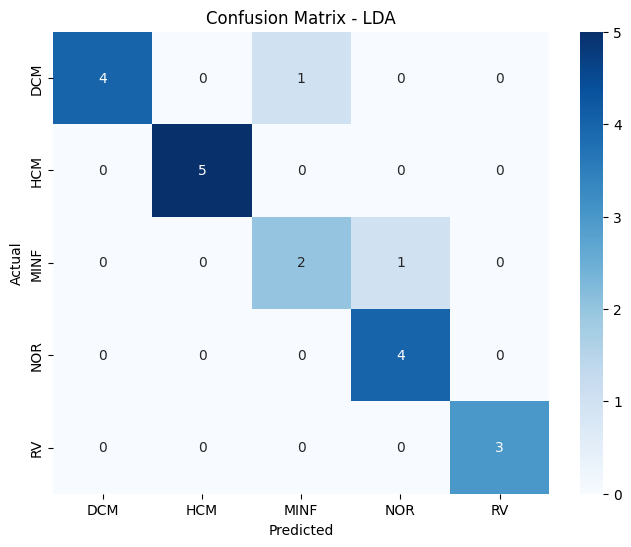

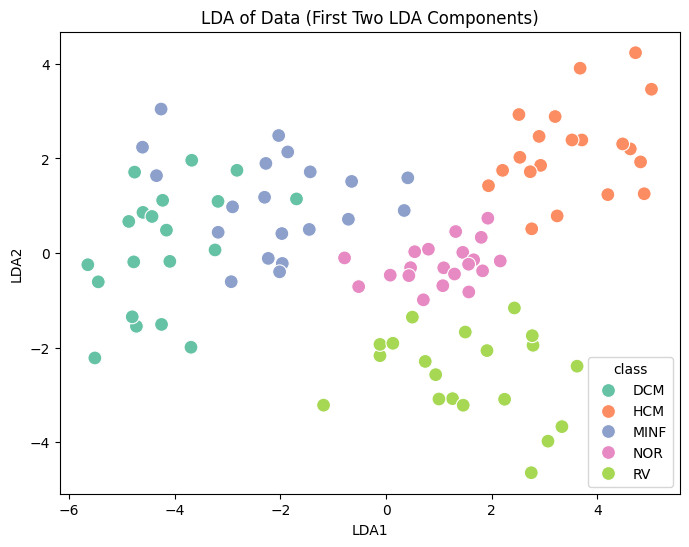

Cumulative Explained Variance Ratio for PCA:
[0.45013608 0.56656789 0.63960041 0.69239199 0.73173703 0.75873942
 0.7842996  0.80380961 0.82092997 0.83435003 0.84766708 0.86023055
 0.87109285 0.88092902 0.88964488 0.89687864 0.90336844]


In [14]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Load your dataset
data = pd.read_csv('ACDC_radiomics.csv')

# Step 2: Separate features (X) and target (y)
numerical_data = data.drop(columns=['class'])  # Features
y = data['class']  # Target (class labels)

# Step 3: Standardize the data (important for PCA and LDA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(numerical_data)

# Step 4: Apply PCA to reduce to 17 components 
pca = PCA(n_components=17)  # You can change 17 to any number of components you want
X_pca = pca.fit_transform(X_scaled)

# Step 5: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Step 6: Apply Linear Discriminant Analysis (LDA)
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

# Step 7: Make predictions on the test set
y_pred = lda.predict(X_test)

# Step 8: Evaluate the model - Accuracy and Confusion Matrix
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=lda.classes_, yticklabels=lda.classes_)
plt.title("Confusion Matrix - LDA")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Step 9: Visualize the LDA components
# Transform the entire dataset to the LDA space
X_lda = lda.transform(X_pca)

# Create a DataFrame for the transformed data
lda_df = pd.DataFrame(X_lda, columns=[f'LDA{i+1}' for i in range(X_lda.shape[1])])
lda_df['class'] = y  # Add class labels for visualization

# Scatter plot of the first two LDA components
plt.figure(figsize=(8, 6))
sns.scatterplot(x='LDA1', y='LDA2', hue='class', data=lda_df, palette='Set2', s=100)
plt.title('LDA of Data (First Two LDA Components)')
plt.show()

# Step 10: Optional - Check cumulative explained variance for PCA components
cumulative_variance = pca.explained_variance_ratio_.cumsum()
print("Cumulative Explained Variance Ratio for PCA:")
print(cumulative_variance)



In [ ]:
##

In [ ]:
# 1. Support Vector Machines with Kernel Trick (SVM with Kernels)

# The kernel trick allows SVM to efficiently perform classification on non-linearly separable data by implicitly mapping it to a higher-dimensional space
# using a kernel function. Instead of explicitly computing the transformation, the kernel function computes the inner product in this high-dimensional space.

# SVM with PCA can help when we want to reduce the dimensionality of the data before classification, making it faster and sometimes more effective.

# SVM with Kernel PCA can handle non-linearly separable data, and combining Kernel PCA with SVM gives you a powerful tool for classification in complex,
# high-dimensional spaces.

# So lets try out this approach and see the results.


SVM with PCA Accuracy: 83.33%
Classification Report for SVM with PCA:
              precision    recall  f1-score   support

         DCM       1.00      1.00      1.00         7
         HCM       0.86      1.00      0.92         6
        MINF       0.80      0.67      0.73         6
         NOR       0.62      0.83      0.71         6
          RV       1.00      0.60      0.75         5

    accuracy                           0.83        30
   macro avg       0.86      0.82      0.82        30
weighted avg       0.86      0.83      0.83        30

SVM with Kernel PCA Accuracy: 16.67%
Classification Report for SVM with Kernel PCA:
              precision    recall  f1-score   support

         DCM       0.00      0.00      0.00         7
         HCM       0.00      0.00      0.00         6
        MINF       0.00      0.00      0.00         6
         NOR       0.00      0.00      0.00         6
          RV       0.17      1.00      0.29         5

    accuracy                   

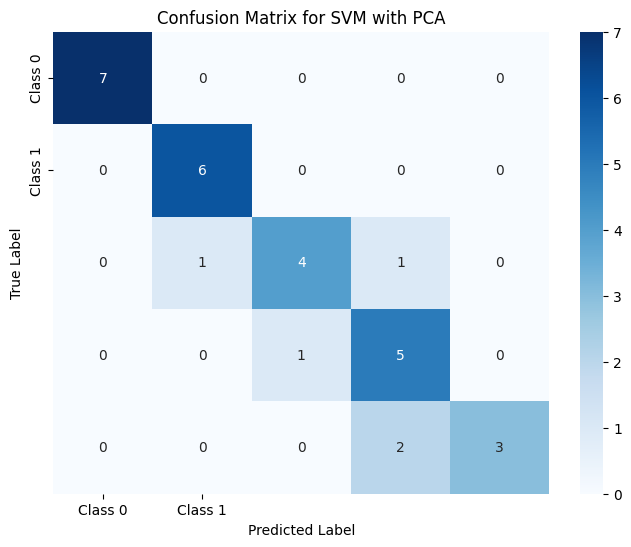

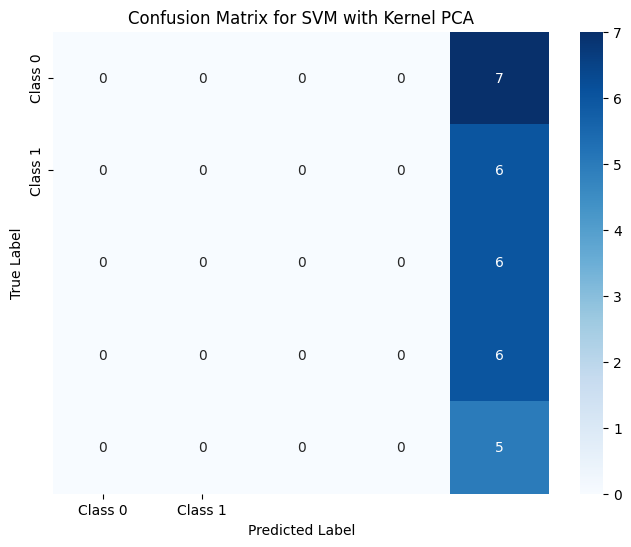

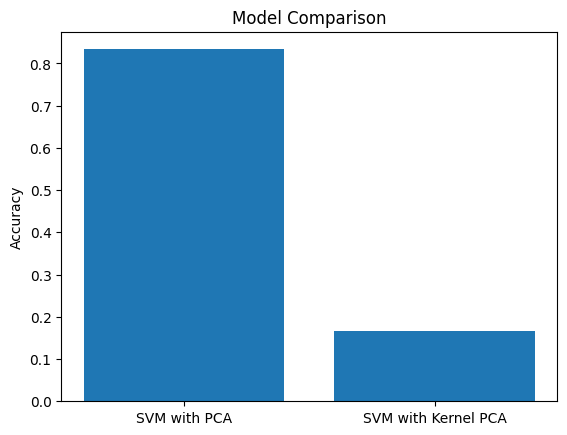

In [26]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, KernelPCA
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# creating the features and target class
X = data.drop(columns=['class'])  # Features
y = data['class']  # Target variable (class labels)

# Step 1: Standardize the data (important for PCA and SVM)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# --- Method 1: SVM with PCA ---
# Step 2: Apply PCA (Dimensionality reduction)
pca = PCA(n_components=17)  # Retain 90% of the variance
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Step 3: Train an SVM classifier on the reduced data
svm_pca = SVC(kernel='linear', class_weight='balanced')  # Linear SVM with balanced class weights
svm_pca.fit(X_train_pca, y_train)

# Step 4: Evaluate the classifier
y_pred_pca = svm_pca.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test, y_pred_pca)
print(f"SVM with PCA Accuracy: {accuracy_pca * 100:.2f}%")

# Print classification report with zero_division set to 0
print("Classification Report for SVM with PCA:")
print(classification_report(y_test, y_pred_pca, zero_division=0))

# --- Method 2: SVM with Kernel PCA ---
# Step 2: Apply Kernel PCA (non-linear dimensionality reduction)
kpca = KernelPCA(kernel='rbf', gamma=0.1, n_components=17)  # You can adjust gamma and n_components
X_train_kpca = kpca.fit_transform(X_train)
X_test_kpca = kpca.transform(X_test)

# Step 3: Train an SVM classifier on the transformed data
svm_kpca = SVC(kernel='linear', class_weight='balanced')  # Linear SVM with balanced class weights
svm_kpca.fit(X_train_kpca, y_train)

# Step 4: Evaluate the classifier
y_pred_kpca = svm_kpca.predict(X_test_kpca)
accuracy_kpca = accuracy_score(y_test, y_pred_kpca)
print(f"SVM with Kernel PCA Accuracy: {accuracy_kpca * 100:.2f}%")

# Print classification report with zero_division set to 0
print("Classification Report for SVM with Kernel PCA:")
print(classification_report(y_test, y_pred_kpca, zero_division=0))

# Optional: Visualize the confusion matrix
cm_pca = confusion_matrix(y_test, y_pred_pca)
cm_kpca = confusion_matrix(y_test, y_pred_kpca)

# Plot confusion matrix for SVM with PCA
plt.figure(figsize=(8, 6))
sns.heatmap(cm_pca, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title("Confusion Matrix for SVM with PCA")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Plot confusion matrix for SVM with Kernel PCA
plt.figure(figsize=(8, 6))
sns.heatmap(cm_kpca, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title("Confusion Matrix for SVM with Kernel PCA")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Model comparison
accuracy_comparison = [accuracy_pca, accuracy_kpca]
methods = ['SVM with PCA', 'SVM with Kernel PCA']
plt.bar(methods, accuracy_comparison)
plt.ylabel('Accuracy')
plt.title('Model Comparison')
plt.show()


In [ ]:
# From the classification reports and accuracies seen, there are clear differences between the SVM with PCA and SVM with Kernel PCA.

##  SVM with PCA:
# Accuracy: 83.33%, which is quite good.
# Precision: Overall, the precision is decent for most classes, with DCM and RV being the most accurate.
# Recall: The model performs well in recalling most classes, but there is a noticeable drop in recall for the 'NOR' and 'MINF' classes.
# F1-Score: Balanced, especially for DCM, HCM, and RV.

##  SVM with Kernel PCA: 
# Accuracy: A significant drop to 16.67%, which suggests that Kernel PCA did not improve or possibly worsen the performance of the SVM.
# Precision, Recall, F1-Score: Most classes have a precision, recall, and F1-score of 0, indicating that the model failed to correctly 
# classify most of the samples. The only class that shows some performance is 'RV,' but the recall is skewed, with a very high value (1.0),
# suggesting that the model could have just predicted 'RV' for most cases but failed to distinguish other classes.

## Summary of observations:
# SVM with PCA performs much better than SVM with Kernel PCA, as evidenced by the higher accuracy, precision, and recall across most classes.
# SVM with Kernel PCA's poor performance might indicate that Kernel PCA is not suitable for this particular dataset or that the hyperparameters or kernel used 
# in the Kernel PCA transformation could need adjustment. I will look into this. But so far SVM with PCA performs much better. I am also
# going to try out SVM alone without intergrating it with any other method. 

In [ ]:
# The visualizations

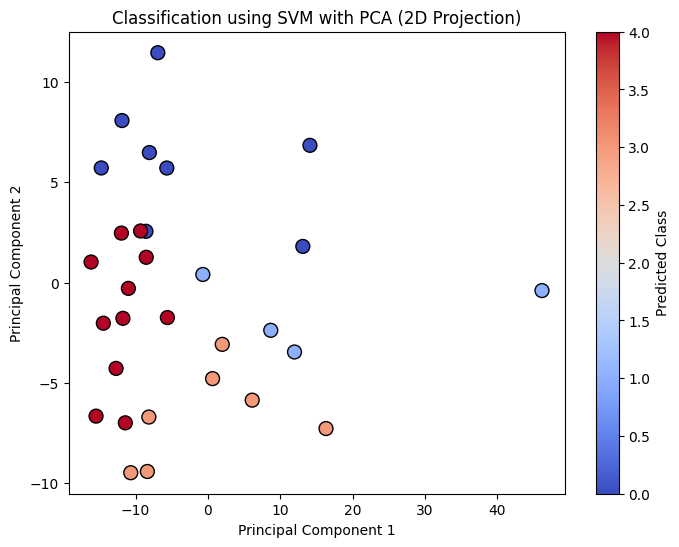

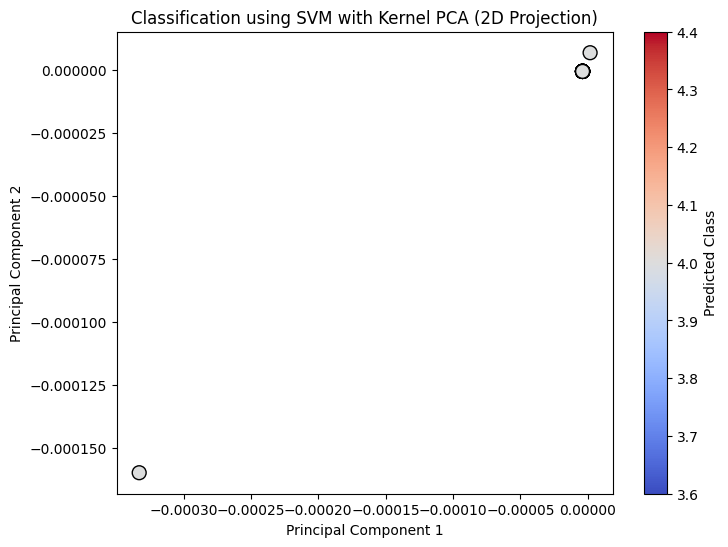

In [21]:
from sklearn.preprocessing import LabelEncoder

# --- Visualization for SVM with PCA ---

# Convert the class labels to numeric values using LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Reduce PCA to 2 components for visualization
pca_2d = PCA(n_components=2)
X_train_pca_2d = pca_2d.fit_transform(X_train)
X_test_pca_2d = pca_2d.transform(X_test)

# Train the SVM classifier on the 2D PCA data
svm_pca.fit(X_train_pca_2d, y_train_encoded)

# Predict the classes
y_pred_pca_2d = svm_pca.predict(X_test_pca_2d)

# Plot the results
plt.figure(figsize=(8, 6))
plt.scatter(X_test_pca_2d[:, 0], X_test_pca_2d[:, 1], c=y_pred_pca_2d, cmap='coolwarm', marker='o', edgecolor='k', s=100)
plt.title("Classification using SVM with PCA (2D Projection)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label='Predicted Class')
plt.show()

# --- Visualization for SVM with Kernel PCA ---

# Reduce Kernel PCA to 2 components for visualization
kpca_2d = KernelPCA(kernel='rbf', gamma=0.1, n_components=2)
X_train_kpca_2d = kpca_2d.fit_transform(X_train)
X_test_kpca_2d = kpca_2d.transform(X_test)

# Train the SVM classifier on the 2D Kernel PCA data
svm_kpca.fit(X_train_kpca_2d, y_train_encoded)

# Predict the classes
y_pred_kpca_2d = svm_kpca.predict(X_test_kpca_2d)

# Plot the results
plt.figure(figsize=(8, 6))
plt.scatter(X_test_kpca_2d[:, 0], X_test_kpca_2d[:, 1], c=y_pred_kpca_2d, cmap='coolwarm', marker='o', edgecolor='k', s=100)
plt.title("Classification using SVM with Kernel PCA (2D Projection)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label='Predicted Class')
plt.show()


In [ ]:
# Theseare all try-outs. I am still changing parameters (Like the kernel type..i.e linear, Sigmoid, rbf etc) to see the different output.